In [2]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
import io

In [3]:
srv1 = 'https://sg.geodatenzentrum.de/wms_dop__88e2cd5d-ffd2-4337-e300-85211caab5c3'
srv2 = 'https://sg.geodatenzentrum.de/wms_dop_hist__88e2cd5d-ffd2-4337-e300-85211caab5c3'

wms = WebMapService(srv1, version='1.1.1')
name = 'rgb'
layer = wms.contents[name]

print("Layers: ", list(wms.contents))
print("-----")
print("Selected: ", name)
print("-----")
print("+ Abstract: ", layer.abstract)
print("+ BBox: ", layer.boundingBoxWGS84)
print("+ CRS: ", layer.crsOptions)
print("+ Styles: ", layer.styles)

Layers:  ['rgb', 'ir', 'cir']
-----
Selected:  rgb
-----
+ Abstract:  Layer für Digitale Orthophotos in 20 cm Bodenauflösung in RGB Farbdarstellung.
+ BBox:  (5.42587260523, 46.9672880527, 15.7908768234, 55.1764096793)
+ CRS:  ['EPSG:102100', 'EPSG:31462', 'EPSG:5677', 'EPSG:32632', 'EPSG:2398', 'EPSG:31465', 'EPSG:3044', 'EPSG:3045', 'EPSG:4326', 'EPSG:32633', 'EPSG:31467', 'EPSG:3068', 'EPSG:3035', 'CRS:84', 'EPSG:4647', 'EPSG:31464', 'EPSG:5676', 'EPSG:900913', 'EPSG:3857', 'EPSG:25832', 'EPSG:5678', 'EPSG:25833', 'EPSG:4839', 'EPSG:31463', 'EPSG:31468', 'EPSG:31466', 'EPSG:3034', 'EPSG:31469', 'EPSG:2397', 'EPSG:5650', 'EPSG:4258', 'EPSG:5679', 'EPSG:2399']
+ Styles:  {'default': {'title': 'default', 'legend': 'https://sg.geodatenzentrum.de/wms_dop__88e2cd5d-ffd2-4337-e300-85211caab5c3?format=image%2Fpng&service=WMS&styles=&version=1.1.1&layer=rgb&request=GetLegendGraphic&sld_version=1.1.0'}}


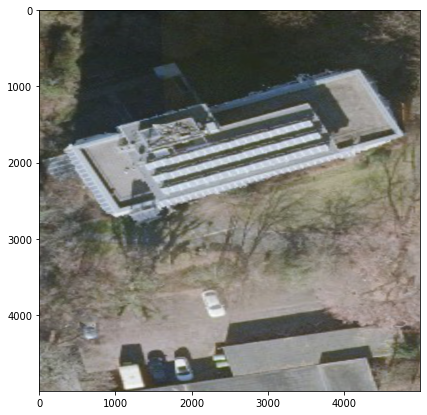

In [13]:
coords = (7.1007,50.7465)
scope = 0.0006
bbox = (coords[0]-scope/2,coords[1]-scope/2,
        coords[0]+scope/2,coords[1]+scope/2)

response = wms.getmap(layers=[name],
                      styles=['default'],
                      srs='EPSG:4326',
                      bbox=bbox,
                      size=(5000,5000),
                      format='image/png',
                      transparent=True)

image = plt.imread(io.BytesIO(response.read()))

plt.figure(figsize=(7,7))
plt.imshow(image)
plt.show()